In [2]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [3]:
data = dataset_nonuniform()
loaders = get_loaders(data, 16)

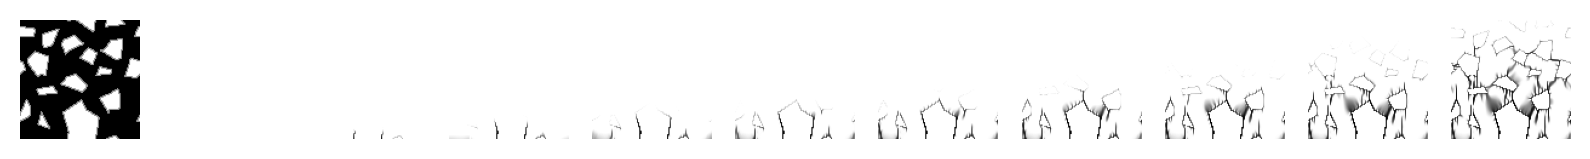

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [9]:
name = 'NN_library/ConvNet/ConvNet'
args = {'lr' : 0.000001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [5]:
net = ConvNet(16)

In [6]:
torch.cuda.empty_cache() 

In [10]:
net = load_network(net, args['name']+'_49', args)

In [11]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.7239778750
Epoch: 0 batch: 100 mean train loss:  0.6921870545
Epoch: 0 batch: 200 mean train loss:  0.7592218085
Epoch: 0 batch: 300 mean train loss:  0.7349869460
Epoch: 0 batch: 400 mean train loss:  0.7178599481
Epoch: 0 batch: 500 mean train loss:  0.7217844073
Epoch: 0 batch: 600 mean train loss:  0.7376435073
Epoch: 0 batch: 700 mean train loss:  0.7759759156
Epoch: 0 mean train loss:  0.7535592173 mean val. rec. loss:  0.7520003319
Epoch: 1 batch: 0 mean train loss:  0.7590158191
Epoch: 1 batch: 100 mean train loss:  0.7483338853
Epoch: 1 batch: 200 mean train loss:  0.7484131372
Epoch: 1 batch: 300 mean train loss:  0.7783102384
Epoch: 1 batch: 400 mean train loss:  0.7379322108
Epoch: 1 batch: 500 mean train loss:  0.7130064624
Epoch: 1 batch: 600 mean train loss:  0.7458840264
Epoch: 1 batch: 700 mean train loss:  0.7562011434
Epoch: 1 mean train loss:  0.7532302847 mean val. rec. loss:  0.7520482540
Epoch: 2 batch: 0 mean train loss:  0.

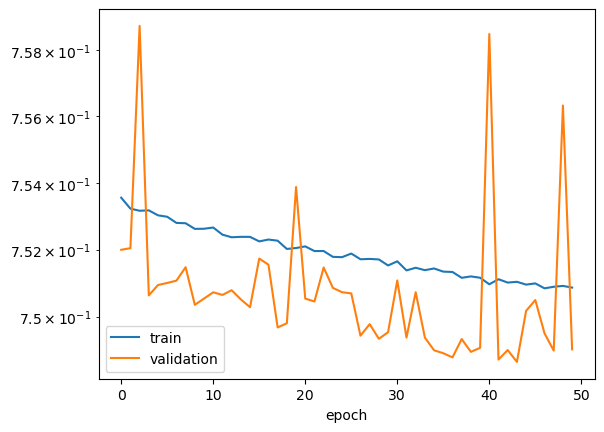

In [12]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')